   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  
MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64


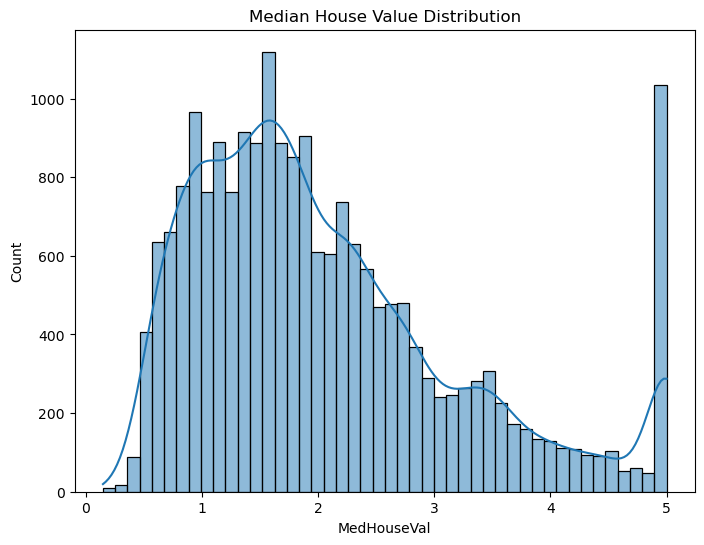

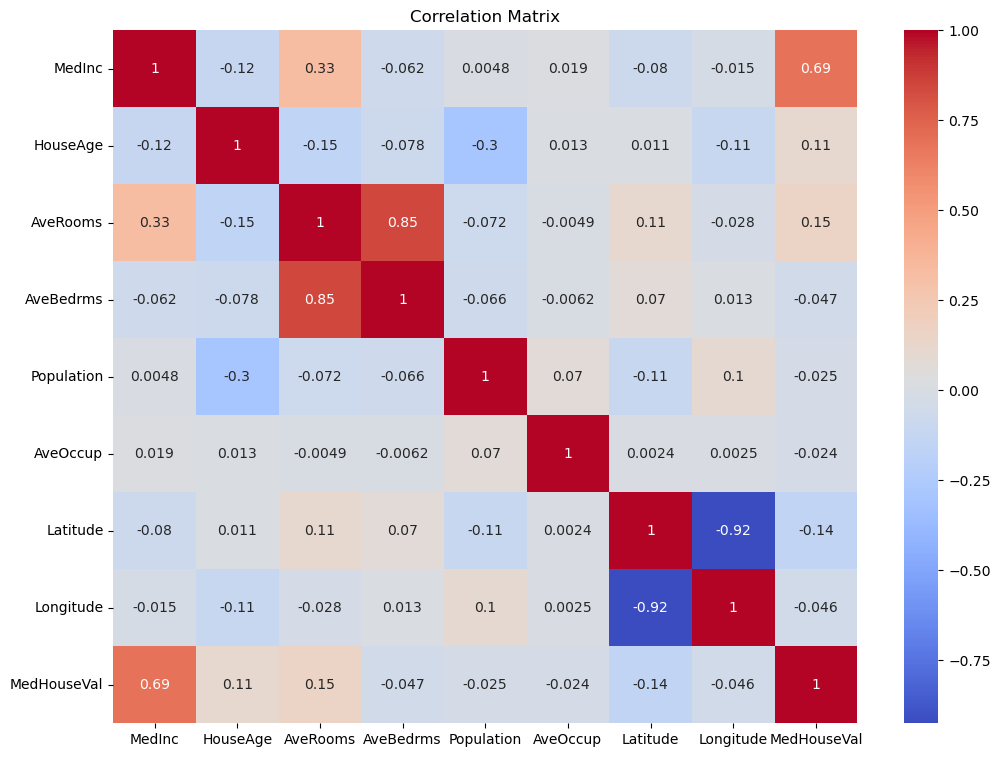

Selected Features: Index(['MedInc', 'AveRooms', 'AveBedrms', 'Latitude', 'Longitude'], dtype='object')
R^2 Score: 0.5675


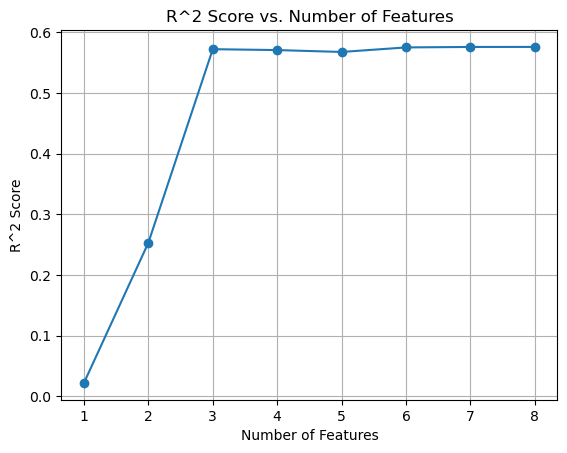

In [3]:
# 1. Library Installation
!pip install numpy pandas matplotlib seaborn scikit-learn

# 2. Library Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE

# 3. Loading the Dataset
data = fetch_california_housing()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['MedHouseVal'] = data.target

# 4. Exploratory Data Analysis
print(df.head())
print(df.isnull().sum()) # check for missing values

# Distribution of the target variable
plt.figure(figsize=(8, 6))
sns.histplot(df['MedHouseVal'], kde=True)
plt.title('Median House Value Distribution')
plt.show()

# Correlation Matrix
correlation_matrix = df.corr()
plt.figure(figsize=(12, 9))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# 5. Feature Engineering & Selection
# Standardizing the features
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

X = df_scaled.drop('MedHouseVal', axis=1)
y = df_scaled['MedHouseVal']

# Feature Selection using RFE
model = LinearRegression()
selector = RFE(model, n_features_to_select=5)
selector = selector.fit(X, y)
selected_features = X.columns[selector.support_]
print("Selected Features:", selected_features)

# 6. Model Training & Evaluation
X_train, X_test, y_train, y_test = train_test_split(X[selected_features], y, test_size=0.2, random_state=42)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(f'R^2 Score: {r2:.4f}')

# 7. Visualizing the Accuracy Improvement
r2_scores = []
feature_counts = list(range(1, X.shape[1] + 1))

for count in feature_counts:
    selector = RFE(model, n_features_to_select=count)
    selector = selector.fit(X, y)
    selected = X.columns[selector.support_]
    
    X_train, X_test, y_train, y_test = train_test_split(X[selected], y, test_size=0.2, random_state=42)
    model.fit(X_train, y_train)
    y_test_pred = model.predict(X_test)
    score = r2_score(y_test, y_test_pred)
    r2_scores.append(score)

plt.plot(feature_counts, r2_scores, marker='o')
plt.title('R^2 Score vs. Number of Features')
plt.xlabel('Number of Features')
plt.ylabel('R^2 Score')
plt.grid(True)
plt.show()


In [4]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor

# Feature Engineering
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# Using Ridge Regression
ridge_model = Ridge(alpha=1)
ridge_model.fit(X_train, y_train)
y_pred = ridge_model.predict(X_test)
r2_ridge = r2_score(y_test, y_pred)
print(f'Ridge Regression R^2 Score: {r2_ridge:.4f}')

# Using RandomForest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
r2_rf = r2_score(y_test, y_pred_rf)
print(f'Random Forest R^2 Score: {r2_rf:.4f}')


Ridge Regression R^2 Score: 0.6471
Random Forest R^2 Score: 0.8022


In [6]:
!pip install xgboost
import xgboost as xgb

# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# XGBoost model
xgb_model = xgb.XGBRegressor(objective ='reg:squarederror', n_estimators=300, learning_rate=0.05, max_depth=5, random_state=42)
xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)
r2_xgb = r2_score(y_test, y_pred_xgb)
print(f'XGBoost R^2 Score: {r2_xgb:.4f}')


  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/32/10/4689bda37403f7dd029d550c4446e0097c2f33b8ae877b235e76d5c49bc2/xgboost-2.0.0-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/99.7 MB ? eta -:--:--
   ---------------------------------------- 0.1/99.7 MB 3.6 MB/s eta 0:00:28
   ---------------------------------------- 0.3/99.7 MB 3.3 MB/s eta 0:00:31
   ---------------------------------------- 0.5/99.7 MB 3.4 MB/s eta 0:00:30
   ---------------------------------------- 0.7/99.7 MB 3.9 MB/s eta 0:00:26
   ---------------------------------------- 0.9/99.7 MB 3.6 MB/s eta 0:00:28
   ---------------------------------------- 1.1/99.7 MB 3.8 MB/s eta 0:00:26
    --------------------------------------- 1.3/99.7 MB 4.2 MB/s eta 0:00:24
    --------------------------------------- 1.5/99.7 MB 4.2 MB/s eta 0:00:24
    --------------------------------------- 1.7/99.7 MB 4.3 MB/s eta 0:00:23
    ----------------------------

XGBoost R^2 Score: 0.8258


In [7]:
!pip install TPOT

  Obtaining dependency information for TPOT from https://files.pythonhosted.org/packages/7b/a7/0060d028906ecd058b1331c3ce6f3f19ba03464b21dc9abbbaf66b0a1091/TPOT-0.12.1-py3-none-any.whl.metadata
     ---------------------------------------- 0.0/1.1 MB ? eta -:--:--
     ---- ----------------------------------- 0.1/1.1 MB 3.3 MB/s eta 0:00:01
     ------------- -------------------------- 0.4/1.1 MB 3.8 MB/s eta 0:00:01
     --------------------- ------------------ 0.6/1.1 MB 4.5 MB/s eta 0:00:01
     --------------------------- ------------ 0.7/1.1 MB 4.2 MB/s eta 0:00:01
     ---------------------------------- ----- 0.9/1.1 MB 4.2 MB/s eta 0:00:01
     ---------------------------------------- 1.1/1.1 MB 4.2 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
   ---------------------------------------- 0.0/87.4 kB ? eta -

In [8]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from tpot import TPOTRegressor

# Load the dataset
data = fetch_california_housing()
X = data.data
y = data.target

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize TPOT regressor
tpot = TPOTRegressor(generations=5, population_size=50, verbosity=2, random_state=42)

# Fit the TPOT regressor on the training data
tpot.fit(X_train, y_train)

# Print the best pipeline
print(tpot.fitted_pipeline_)

# Evaluate the final model on the test data
print(tpot.score(X_test, y_test))


G:\Install\Lib\site-packages\tpot\builtins\__init__.py:36: UserWarning: Warning: optional dependency `torch` is not available. - skipping import of NN models.
  warnings.warn("Warning: optional dependency `torch` is not available. - skipping import of NN models.")


Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -0.23332714085459144

Generation 2 - Current best internal CV score: -0.2276656412245926

Generation 3 - Current best internal CV score: -0.22540928450985104

Generation 4 - Current best internal CV score: -0.2227595257765858

Generation 5 - Current best internal CV score: -0.2227595257765858

Best pipeline: RidgeCV(XGBRegressor(input_matrix, learning_rate=0.1, max_depth=7, min_child_weight=6, n_estimators=100, n_jobs=1, objective=reg:squarederror, subsample=0.7000000000000001, verbosity=0))
Pipeline(steps=[('stackingestimator',
                 StackingEstimator(estimator=XGBRegressor(base_score=None,
                                                          booster=None,
                                                          callbacks=None,
                                                          colsample_bylevel=None,
                                                          colsample_bynode=None,
                                 